In [ ]:
# Dataset link: https://www.kaggle.com/hemanthhari/symptoms-and-covid-presence

In [ ]:
import pandas as pd
import numpy as np
 
from sklearn import tree
from sklearn.model_selection import train_test_split
 
import collections
from collections import Counter
from PIL import Image

#tree plotting
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#plotting graph
from matplotlib import pyplot as plt
import seaborn as sns
 
#present decision tree
import graphviz
import pydotplus
import io
from scipy import misc

#accuracy measurement
from sklearn.metrics import accuracy_score

#model library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [ ]:
# Data visualization
data = pd.read_csv("Covid Dataset.csv")
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


In [ ]:
# Check, is there any missing data in any row or column 
data.isnull().any()

Breathing Problem                          False
Fever                                      False
Dry Cough                                  False
Sore throat                                False
Running Nose                               False
Asthma                                     False
Chronic Lung Disease                       False
Headache                                   False
Heart Disease                              False
Diabetes                                   False
Hyper Tension                              False
Fatigue                                    False
Gastrointestinal                           False
Abroad travel                              False
Contact with COVID Patient                 False
Attended Large Gathering                   False
Visited Public Exposed Places              False
Family working in Public Exposed Places    False
Wearing Masks                              False
Sanitization from Market                   False
COVID-19            

In [ ]:
# Describe dataset
data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [ ]:
# Rename column
data.rename(columns={'COVID-19':'COVID'}, inplace=True)
#data.head(5)

In [ ]:
# Transform data string to numeric (Yes,No)=>(1,0)
#from sklearn.preprocessing import LabelEncoder
#l=LabelEncoder()
#data=data.apply(l.fit_transform).astype(int)
# Another way to do this:
for i in data.columns: 
    data[i] = np.where(data[i] =="Yes", 1, 0)
data.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
# Co-relation between columns
cor=data.corr()
cor

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


In [ ]:
# Drop the column of Sanitization from Market and Wearing Masks
data.drop(['Sanitization from Market', 'Wearing Masks'], axis = 'columns', inplace = True)
#data.to_csv('project_data.csv', index = False)
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1


In [ ]:
# Taking all columns to a variable(named features)
features = data.columns
features

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID'],
      dtype='object')

In [ ]:
# Seperate deciding-factor column/class from all columns or from features variable
features=[x for x in features if x!='COVID']
features

['Breathing Problem',
 'Fever',
 'Dry Cough',
 'Sore throat',
 'Running Nose',
 'Asthma',
 'Chronic Lung Disease',
 'Headache',
 'Heart Disease',
 'Diabetes',
 'Hyper Tension',
 'Fatigue ',
 'Gastrointestinal ',
 'Abroad travel',
 'Contact with COVID Patient',
 'Attended Large Gathering',
 'Visited Public Exposed Places',
 'Family working in Public Exposed Places']

In [ ]:
# Dataset splition and create two dataset(train dataset,test dataset) from main dataset
# Test dataset size = 20% = 0.2
train, test = train_test_split(data, test_size = 0.3)

# Seperate deciding-factor column/class from train and test dataset
x_train = train[features]
y_train = train['COVID']

x_test = test[features]
y_test = test['COVID']

print(len(data))
print(len(train))
print(len(test))

5434
3803
1631


In [ ]:
# Created a model function for all ML-algorithm
def modelRun(model, name, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("\n",name,":\n")
    print('Accuracy is  :' ,round(accuracy,2)*100)
    print('F1 score is :' ,round(f1,2)*100)
    print('Precision is  :',round(precision,2)*100)
    print('Recall is  :',round(recall,2)*100)
    print('Roc Auc is  :',round(roc_auc,2)*100)
    return y_pred

In [ ]:
# Setup or initialize variable with ML algorithm
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
nn = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 900, activation = 'relu')
dt = DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [ ]:
# After executing function modelrun(), it will provide predict value and print accuracy score for each ML algorithm 
y_pred_nb = modelRun(nb, "Gaussian Naive Bayes", x_train, y_train, x_test, y_test)
y_pred_rf = modelRun(rf, "Random Forest", x_train, y_train, x_test, y_test)
y_pred_nn = modelRun(nn, "Neural Network", x_train, y_train, x_test, y_test)
y_pred_dt = modelRun(dt, "Decision Tree", x_train, y_train, x_test, y_test)


 Gaussian Naive Bayes :

Accuracy is  : 76.0
F1 score is : 82.0
Precision is  : 100.0
Recall is  : 70.0
Roc Auc is  : 85.0

 Random Forest :

Accuracy is  : 87.0
F1 score is : 92.0
Precision is  : 86.0
Recall is  : 100.0
Roc Auc is  : 69.0

 Neural Network :

Accuracy is  : 98.0
F1 score is : 99.0
Precision is  : 99.0
Recall is  : 99.0
Roc Auc is  : 97.0

 Decision Tree :

Accuracy is  : 96.0
F1 score is : 97.0
Precision is  : 97.0
Recall is  : 98.0
Roc Auc is  : 93.0


In [ ]:
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_nb)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_rf)
fpr_nn, tpr_nn, threshold_nn = roc_curve(y_test, y_pred_nn)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_dt)

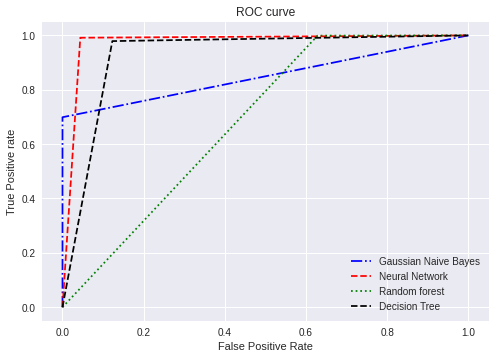

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_nb, tpr_nb, linestyle='dashdot',color='blue', label='Gaussian Naive Bayes')
plt.plot(fpr_nn, tpr_nn, linestyle='--',color='red', label='Neural Network')
plt.plot(fpr_rf, tpr_rf, linestyle='dotted',color='green', label='Random forest')
plt.plot(fpr_dt, tpr_dt, linestyle='dashed',color='black', label='Decision Tree')

#plt.plot(p_fpr, p_tpr, linestyle='solid', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
data['COVID'] = np.where(data['COVID'] == 1, "Yes", data['COVID'])
data['COVID'] = np.where(data['COVID'] == 0, "No", data['COVID'])

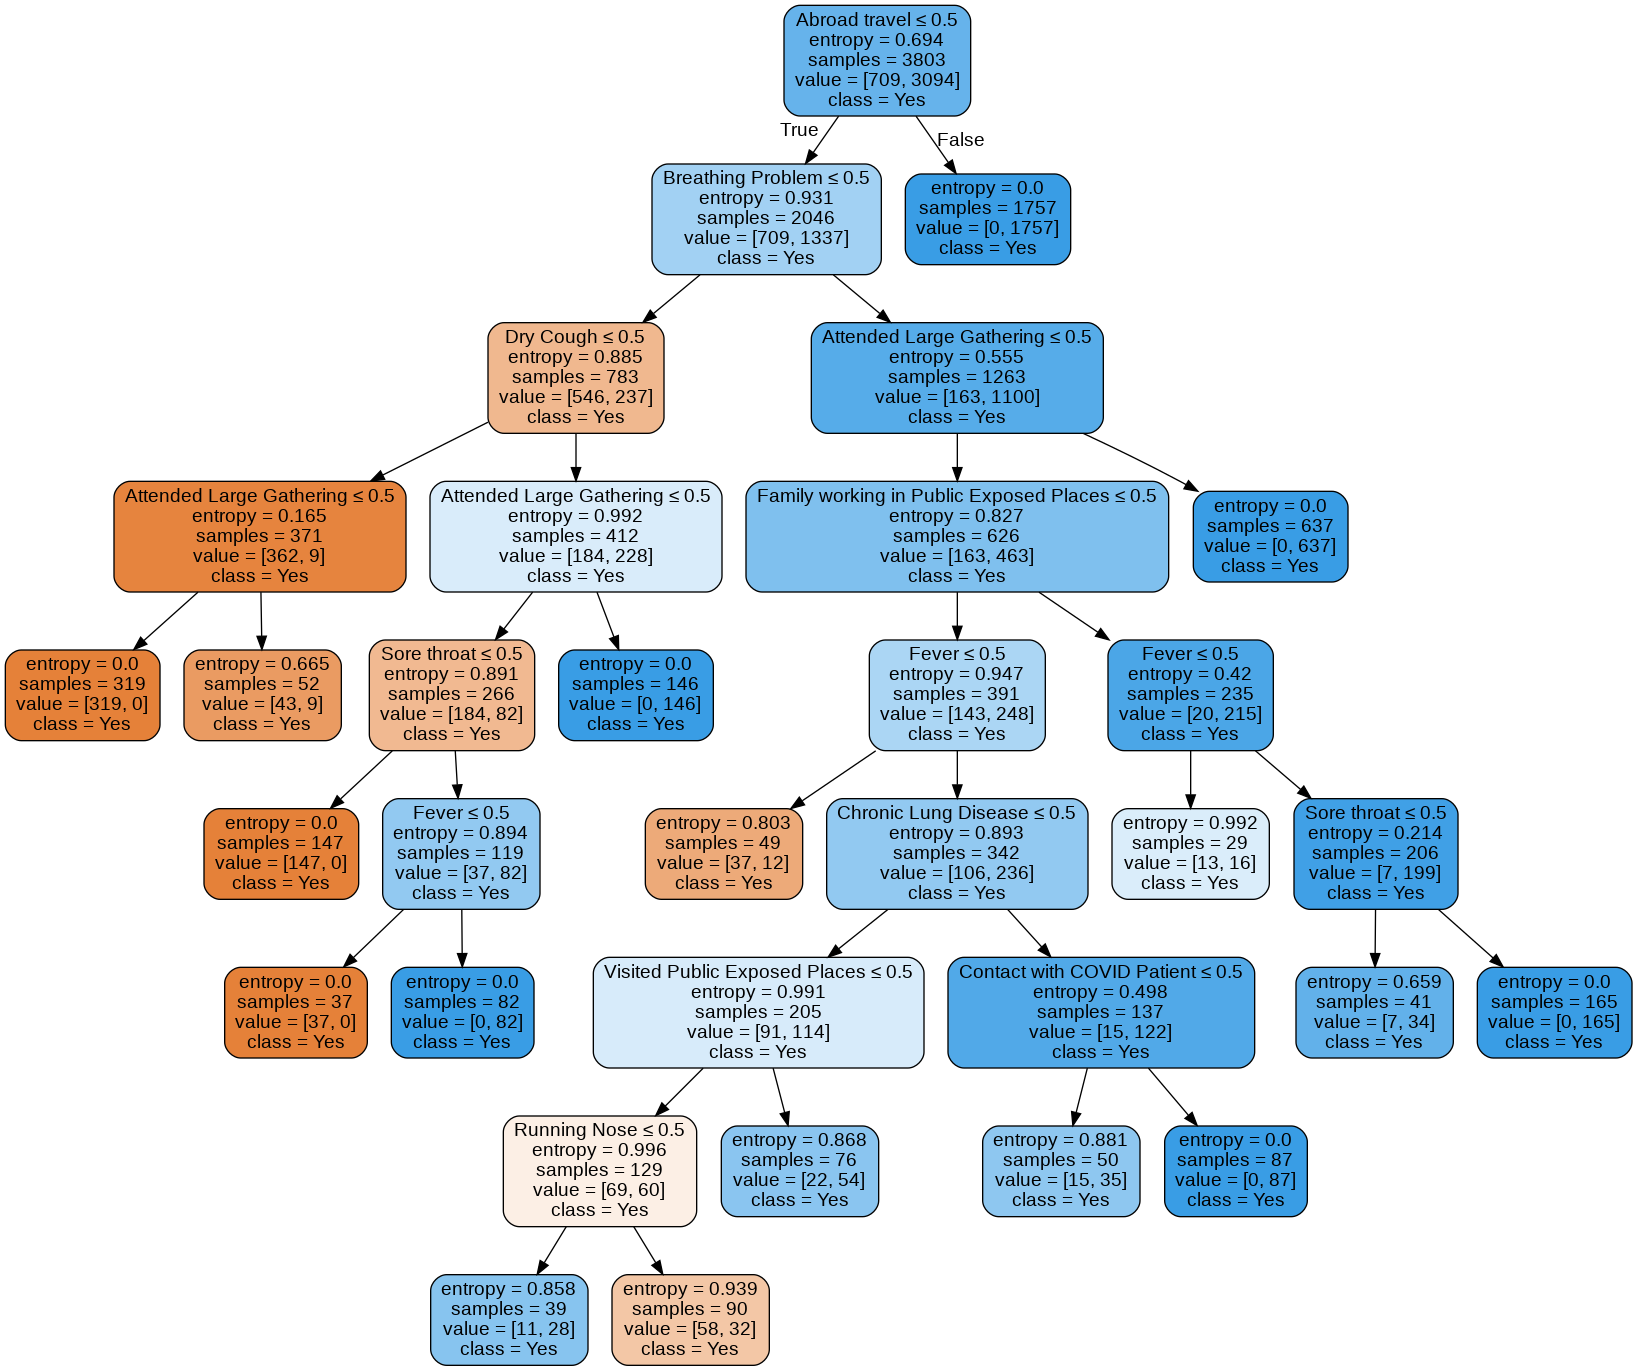

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,class_names=data.COVID,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Providing this info, you can check: Are you covid affected or not?
print("Enter the data of following",len(features),"symptoms for COVID checking :")
print("(If you have this symptoms enter 1 otherwise 0)")
arr = []
for i in range(len(features)):
    print("{}".format(features[i]))
    arr.append(int(input()))

arr = np.array(arr)
print(arr)
res = nn.predict(arr.reshape(-1,18))

if res == 1:
    print("Yes, you have covid")
else:
    print("No, you dont have covid")

Enter the data of following 18 symptoms for COVID checking :
(If you have this symptoms enter 1 otherwise 0)
Breathing Problem
Fever
